In [42]:
import os
import yaml
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from collections import Counter
import random
import shutil

In [43]:
yaml_file = '../config/yolo_config/config_7_classes.yaml'

source_folder = 'C:/Users/Paolo/Desktop/Datasets/Dataset con distrattori - Traffic Sign Detenction - CODICE 3 - (900 immagini)/dataset_parsed'
source_folder_images = 'C:/Users/Paolo/Desktop/Datasets/Dataset con distrattori - Traffic Sign Detenction - CODICE 3 - (900 immagini)/dataset_parsed/images'
source_folder_labels = 'C:/Users/Paolo/Desktop/Datasets/Dataset con distrattori - Traffic Sign Detenction - CODICE 3 - (900 immagini)/dataset_parsed/labels'
destination_folder = 'C:/Users/Paolo/Desktop/Dataset 900 images modified'
destination_folder_images = 'C:/Users/Paolo/Desktop/Dataset 900 images modified/images'
destination_folder_labels = 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'

# min number of images for each partition
min_elementi_training = 1
min_elementi_test = 1
min_elementi_validation = 1

# partitioning percentage
percentuale_training = 0.7
percentuale_test = 0.15
percentuale_validation = 0.15

In [54]:
dict_classes = {0: 'prohibitory', 1: 'danger', 2: 'mandatory', 3: 'priority road', 4: 'give way', 5: 'stop', 6: 'no entry'}
num_classes = len(dict_classes)
dict_distribution = {}
for index in range(num_classes):
        dict_distribution[index] = 0

mapping_c_sc = {
    0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 2, 7: 0, 8: 0, 9: 0, 10: 0,
    11: 1, 12: 3, 13: 4, 14: 5, 15: 0, 16: 0, 17: 6, 18: 1, 19: 1, 20: 1,
    21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1,
    31: 1, 32: 2, 33: 2, 34: 2, 35: 2, 36: 2, 37: 2, 38: 2, 39: 2, 40: 2, 41: 2, 42: 2}


In [55]:
display(dict_distribution)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

In [45]:
def read_config_file(path):
    global num_classes
    # apro il file di configurazione in lettura
    with open(path, 'r', encoding="utf8") as y:
        classes = yaml.safe_load(y)['names']   
    # popolo i dizionario delle classi e della distribuzione degli oggetti nel dataset
    for index, c in enumerate(classes):
        dict_classes[index] = c  
        dict_distribution[index] = 0
    num_classes = len(dict_classes)

read_config_file(yaml_file)

In [46]:
display(dict_classes)
display(dict_distribution)
display(num_classes)

{0: 'prohibitory',
 1: 'danger',
 2: 'mandatory',
 3: 'priority road',
 4: 'give way',
 5: 'stop',
 6: 'no entry'}

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

7

In [7]:
def generate_mapped_labels(source, destination, mapping):
    count = 0
    os.makedirs(destination)
    # verify that the folder exists
    if not os.path.exists(source):
        print(f"The folder '{source}' not exists.")
    else:
        # scan files in the folders
        for nome_file in os.listdir(source):
            new_content = ""
            if nome_file.endswith('.txt'):
                # open file in read mode and write mode
                with open(os.path.join(source, nome_file), 'r+') as file:
                    righe = file.readlines()
                    # iterate for each row and replace the class id with new class id
                    for riga in righe:
                        class_id = ""
                        i = 0
                        while i < len(riga) and riga[i].isdigit():
                            class_id += riga[i]
                            i += 1
                        if class_id:
                            parsed_class_id = mapping[int(class_id)]
                            rest = riga[i:]
                            new_row = f"{parsed_class_id}{rest}"
                            new_content = new_content + new_row          
                # create the path of the new file
                path_new_file = os.path.join(destination, nome_file)
                # open the new file in read mode and write mode
                with open(path_new_file, 'w') as new_file:
                    count = count + 1
                    new_file.write(new_content)
                print(f"New file '{path_new_file}' created and saved in the folder '{destination}'.")
    print("They were created", count, "new files in", destination)


generate_mapped_labels(source_folder_labels, destination_folder_labels, mapping_c_sc)


New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00000.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'.
New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00001.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'.
New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00002.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'.
New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00003.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'.
New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00004.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels'.
New file 'C:/Users/Paolo/Desktop/Dataset 900 images modified/labels\00005.txt' created and saved in the folder 'C:/Users/Paolo/Desktop/Datas

In [8]:
def calculate_distribution_classes(folder, classes):
    count = 0
    distribution = {}
    for index in range(0, classes):
        distribution[index] = 0
    # loop through all files in the folder
    for file_nome in os.listdir(folder):
        file_path = os.path.join(folder, file_nome)
        # check if it is a file
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                for riga in file:
                    # read the first integer of the line
                    count = count + 1
                    stringa = riga.strip()  
                    parti = stringa.split()
                    if len(parti) >= 1 and parti[0].isdigit():
                        distribution[int(parti[0])] += 1              
    print("Number of the istances", count)
    return distribution
                        
dict_distribution = calculate_distribution_classes(destination_folder_labels, num_classes)
display(dict_distribution)

Number of the istances 1213


{0: 557, 1: 219, 2: 208, 3: 85, 4: 83, 5: 32, 6: 29}

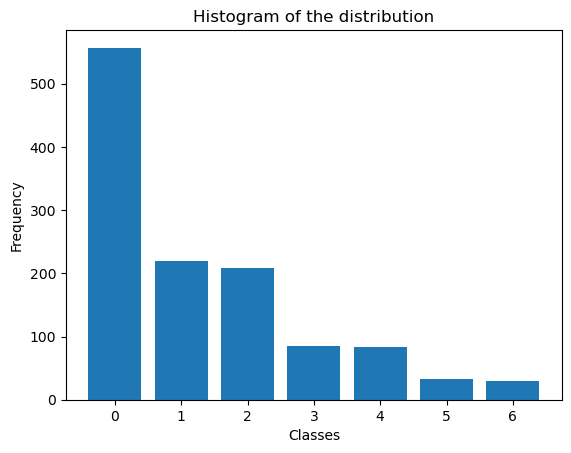

In [9]:
def print_distribution_histogram(distribution):
    # Extract date from the dictionary
    keys = list(distribution.keys())
    values = list(distribution.values())
    # create histogram
    plt.bar(keys, values)
    # add labels and titles
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.title('Histogram of the distribution')
    # show graph
    plt.show()

print_distribution_histogram(dict_distribution)

In [36]:
def create_sets_images(path_labels, path_images):
    filename_images = set()
    filename_images_with_signs = set()
    filename_images_without_signs = set()
    
    # list of images with signs
    for file in os.listdir(path_labels):
        filename = os.path.splitext(file)[0]
        filename_images_with_signs.add(filename)
        
    # list of images with and without signs
    for file in os.listdir(path_images):
        filename = os.path.splitext(file)[0]
        filename_images.add(filename)
        
    filename_images_without_signs = filename_images.difference(filename_images_with_signs)
    
    # print the results
    print(len(filename_images_without_signs), "images without signs")
    print(len(filename_images_with_signs), "images with signs")
    print(len(filename_images), "total images\n\n")
    print("List of images without signs: ")
    print(filename_images_without_signs)
    print("--\nList of images with signs: ")
    print(filename_images_with_signs)
    
    return filename_images, filename_images_with_signs, filename_images_without_signs

def stratified_sampling(destination_folder_labels, dict_distribution, source_images):
    # sets
    images = set()
    images_with_signs = set()
    images_without_signs = set()
    images, images_with_signs, images_without_signs = create_sets_images(destination_folder_labels, source_images)

    dataset_path = Path(destination_folder_labels)
    labels = sorted(dataset_path.rglob("*.txt")) 
    indx = [l.stem for l in labels]        
    labels_df = pd.DataFrame([], columns=dict_distribution.keys(), index=indx)
    for label in labels:
        lbl_counter = Counter()
        with open(label,'r') as lf:
            lines = lf.readlines()
        for l in lines:
            # classes for YOLO label uses integer at first position of each line
            lbl_counter[int(l.split(' ')[0])] += 1
        labels_df.loc[label.stem] = lbl_counter
    labels_df = labels_df.fillna(0.0) # replace `nan` values with `0.0`
    # display(labels_df)
    
    # stratified sampling
    partitions_for_each_class = [[] for _ in range(len(dict_distribution))]
    # ascending sorting of keys based on values
    classes_key_orderd_for_freq = sorted(dict_distribution, key=lambda k: dict_distribution[k])
    filenames_used_for_train = set()
    filenames_used_for_test = set()
    filenames_used_for_valid = set()
    
    # seed random
    random.seed(42)
    
    # partition the images that have signs
    for class_idx in classes_key_orderd_for_freq:
        print("Operazioni per la classe", str(class_idx))
        
        df_class_idx = labels_df.loc[labels_df[class_idx] != 0.0][class_idx]
        filenames = set(df_class_idx.index)
        
        filenames.difference_update(filenames_used_for_train)
        filenames.difference_update(filenames_used_for_test)
        filenames.difference_update(filenames_used_for_valid)
        
        # convert set to list
        filenames = list(filenames)
    
        # shuffle
        random.shuffle(filenames)
        
        # calculate length
        lunghezza_totale = len(filenames)
    
        # calculate partial lengths
        lunghezza_training = max(min_elementi_training, int(lunghezza_totale * percentuale_training))
        lunghezza_test = max(min_elementi_test, int(lunghezza_totale * percentuale_test))
        #lunghezza_validation = max(min_elementi_validation, int(lunghezza_totale * percentuale_validation))
        
        # split lists
        training_set = filenames[:lunghezza_training]
        test_set = filenames[lunghezza_training:(lunghezza_training + lunghezza_test)]
        validation_set = filenames[(lunghezza_training + lunghezza_test):]
        
        # update the sets of file used
        filenames_used_for_train.update(training_set)
        filenames_used_for_test.update(test_set)
        filenames_used_for_valid.update(validation_set)
        
        # add for each array the partitions for each class  
        partitions_for_each_class[class_idx].append(training_set)
        partitions_for_each_class[class_idx].append(test_set)
        partitions_for_each_class[class_idx].append(validation_set)
    
    # split the images without signs
    images_without_signs = list(images_without_signs)
    random.shuffle(images_without_signs)
    lunghezza_totale = len(images_without_signs)
    
    # calcolo le lunghezze dei set basate sulle percentuali
    lunghezza_training = max(min_elementi_training, int(lunghezza_totale * percentuale_training))
    lunghezza_test = max(min_elementi_test, int(lunghezza_totale * percentuale_test))
    #lunghezza_validation = max(min_elementi_validation, int(lunghezza_totale * percentuale_validation))
    
    # split list
    training_set_without_signs = images_without_signs[:lunghezza_training]
    test_set_without_signs = images_without_signs[lunghezza_training:(lunghezza_training + lunghezza_test)]
    validation_set_without_signs = images_without_signs[(lunghezza_training + lunghezza_test):]
    
    return partitions_for_each_class, training_set_without_signs, test_set_without_signs, validation_set_without_signs
    


In [37]:
partitions, training_set_without_signs, test_set_without_signs, validation_set_without_signs = stratified_sampling(destination_folder_labels, dict_distribution, source_folder_images)

159 images without signs
741 images with signs
900 total images


List of images without signs: 
{'00781', '00629', '00576', '00856', '00617', '00636', '00815', '00429', '00796', '00213', '00489', '00424', '00800', '00469', '00708', '00709', '00394', '00329', '00724', '00559', '00591', '00235', '00568', '00537', '00727', '00549', '00569', '00843', '00437', '00454', '00666', '00769', '00687', '00108', '00748', '00364', '00555', '00365', '00361', '00830', '00832', '00745', '00407', '00590', '00767', '00562', '00586', '00743', '00596', '00547', '00342', '00550', '00321', '00345', '00581', '00627', '00618', '00336', '00409', '00578', '00890', '00585', '00768', '00812', '00814', '00804', '00525', '00533', '00718', '00577', '00600', '00584', '00583', '00677', '00793', '00462', '00543', '00332', '00676', '00535', '00819', '00399', '00532', '00354', '00840', '00539', '00510', '00326', '00594', '00592', '00614', '00643', '00875', '00522', '00573', '00572', '00145', '00563', '00757', '00652', '0

In [41]:
def create_directories(destination_folder, partitions_for_each_class):
    # create directory
    path = destination_folder + '/stratified_sampling'
    path_train = path + "/train"
    path_test = path + "/test"
    path_valid = path + "/valid"
    path_train_images = path_train + "/images"
    path_train_labels = path_train + "/labels"
    path_test_images = path_test + "/images"
    path_test_labels = path_test + "/labels"
    path_valid_images = path_valid + "/images"
    path_valid_labels = path_valid + "/labels"
    # create the folder root
    os.makedirs(path)
    # create the folders train, test and valid
    os.makedirs(path_train)
    os.makedirs(path_test)
    os.makedirs(path_valid)
    # create the folders images and labels
    os.makedirs(path_train_images)
    os.makedirs(path_train_labels)
    os.makedirs(path_test_images)
    os.makedirs(path_test_labels)
    os.makedirs(path_valid_images)
    os.makedirs(path_valid_labels)
    for indice, partitions in enumerate(partitions_for_each_class):
        path2 = path + '/' + str(indice)
        path2_train = path2 + '/train'
        path2_train_images = path2_train + '/images'
        path2_train_labels = path2_train + '/labels'
        path2_test = path2 + '/test'
        path2_test_images = path2_test + '/images'
        path2_test_labels = path2_test + '/labels'
        path2_valid = path2 + '/valid'
        path2_valid_images = path2_valid + '/images'
        path2_valid_labels = path2_valid + '/labels'
        os.makedirs(path2)
        os.makedirs(path2_train)
        os.makedirs(path2_train_images)
        os.makedirs(path2_train_labels)
        os.makedirs(path2_test)
        os.makedirs(path2_test_images)
        os.makedirs(path2_test_labels)
        os.makedirs(path2_valid)
        os.makedirs(path2_valid_images)
        os.makedirs(path2_valid_labels)

create_directories(destination_folder, partitions)
